# Classification By Two Different Methods
## Method 1 - Backpropagation in a Neural Network
`Backpropagation` is the essence of neural net training. It is the practice of fine-tuning the weights of a neural net based on the error rate (i.e. `loss`) obtained in the previous epoch (i.e. `iteration`.) Proper tuning of the weights ensures lower error rates, making the model reliable by increasing its generalization.

I will use the training datasets in dataset 1 and 2 to train the neural network, and then use the testing datasets in datasets 1 and 2 respectively to test the accuracy of the neural network I trained. You can find the datasets used for training and testing on my GitHub page [here](https://github.com/JordanVencel/LinearClassificationTech). 

I will use the `sigmoid function` in the neurons in the hidden and output layers. The `learning rate` is set to 0.8. The `parameter 𝛽` in the logistic function is set to 1.

### Step 1: Read In Data

In [24]:
# Initial imports 
import pandas as pd 
import numpy as np 
import urllib3
from bs4 import BeautifulSoup

In [25]:
# Convert raw txt data into a usable format for each dataset
http = urllib3.PoolManager()
response = http.request('GET', "https://raw.githubusercontent.com/JordanVencel/LinearClassificationTech/main/dataset1_training.txt") 
soup = BeautifulSoup(response.data)

separated_str_list = []
for line in soup:
    chunks = line.split('\n')

for chunk in chunks:
    chunk = chunk.lstrip()
    chunk = chunk.rstrip()
    chunk = chunk.replace("  ", " ")
    chunk = chunk.replace("  ", " ")
    chunk = chunk.replace(" ", ",")
    separated_str_list.append(chunk)

training_1_csv = np.savetxt("training_1_csv.csv", separated_str_list, delimiter=" ", fmt='% s')

In [26]:
http = urllib3.PoolManager()
response = http.request('GET', "https://raw.githubusercontent.com/JordanVencel/LinearClassificationTech/main/dataset1_testing.txt") 
soup = BeautifulSoup(response.data)

separated_str_list = []
for line in soup:
    chunks = line.split('\n')

for chunk in chunks:
    chunk = chunk.lstrip()
    chunk = chunk.rstrip()
    chunk = chunk.replace("  ", " ")
    chunk = chunk.replace("  ", " ")
    chunk = chunk.replace(" ", ",")
    separated_str_list.append(chunk)

testing_1_csv = np.savetxt("testing_1_csv.csv", separated_str_list, delimiter=" ", fmt='% s')

In [4]:
http = urllib3.PoolManager()
response = http.request('GET', "https://raw.githubusercontent.com/JordanVencel/LinearClassificationTech/main/dataset2_training.txt")
soup = BeautifulSoup(response.data)

separated_str_list = []
for line in soup:
    chunks = line.split('\n')

for chunk in chunks:
    chunk = chunk.lstrip()
    chunk = chunk.rstrip()
    chunk = chunk.replace("  ", " ")
    chunk = chunk.replace("  ", " ")
    chunk = chunk.replace(" ", ",")
    separated_str_list.append(chunk)

training_2_csv = np.savetxt("training_2_csv.csv", separated_str_list, delimiter=" ", fmt='% s')

In [5]:
http = urllib3.PoolManager()
response = http.request('GET', "https://raw.githubusercontent.com/JordanVencel/LinearClassificationTech/main/dataset2_testing.txt")
soup = BeautifulSoup(response.data)

separated_str_list = []
for line in soup:
    chunks = line.split('\n')

for chunk in chunks:
    chunk = chunk.lstrip()
    chunk = chunk.rstrip()
    chunk = chunk.replace("  ", " ")
    chunk = chunk.replace("  ", " ")
    chunk = chunk.replace(" ", ",")
    separated_str_list.append(chunk)

testing_2_csv = np.savetxt("testing_2_csv.csv", separated_str_list, delimiter=" ", fmt='% s')

In [6]:
training1 = pd.read_csv("training_1_csv.csv", names=['x','y','class_label'], sep=",")
print(training1)

testing1 = pd.read_csv("testing_1_csv.csv", names=['x','y','class_label'], sep=",")
print(testing1)

training2 = pd.read_csv("training_2_csv.csv", names=['x','y','class_label'], sep=",")
print(training2)

testing2 = pd.read_csv("testing_2_csv.csv", names=['x','y','class_label'], sep=",")
print(testing2)

        x     y  class_label
0    1.53  3.13            0
1    0.58  2.83            0
2    0.28  2.69            0
3    1.14  2.14            0
4    1.46  3.39            0
..    ...   ...          ...
495  2.37  0.93            1
496  2.85  0.52            1
497  2.35  0.39            1
498  2.96  1.68            1
499  2.56  0.16            1

[500 rows x 3 columns]
        x     y  class_label
0    2.16  3.91            0
1   -0.22  1.73            0
2    2.00  3.92            0
3    0.53  2.97            0
4    1.38  3.57            0
..    ...   ...          ...
175  2.72  1.00            1
176  3.55  1.18            1
177  2.75  0.12            1
178  3.67  2.02            1
179  3.29  1.07            1

[180 rows x 3 columns]
            x         y  class_label
0    0.130359  0.026001            1
1   -0.274629  0.985175            0
2   -0.004553  0.074094            1
3    0.119707  0.121914            1
4    0.041210  0.144460            1
..        ...       ...          .

<AxesSubplot:xlabel='x', ylabel='y'>

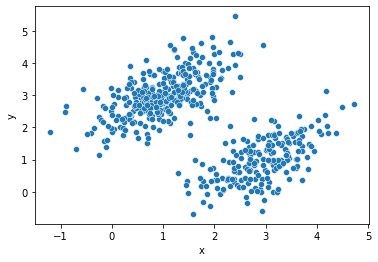

In [7]:
import seaborn as sb
sb.scatterplot(data=training1, x='x',y='y')

<AxesSubplot:xlabel='x', ylabel='y'>

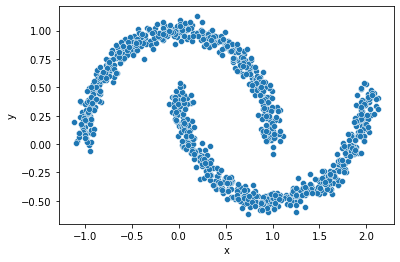

In [8]:
sb.scatterplot(data=training2, x='x',y='y')

### Step 2: Initialize Network

In [9]:
from random import seed
from random import random

def initialize_network(n_inputs, n_hidden, n_outputs):
    network = list()
    hidden_layer = [{'weights':[random() for i in range(n_inputs + 1)]} for i in range(n_hidden)]
    network.append(hidden_layer)
    output_layer = [{'weights':[random() for i in range(n_hidden + 1)]} for i in range(n_outputs)]
    network.append(output_layer)
    return network

### Step 3: Forward Propagate
    Step 3A: Neuron Activation

In [10]:
from math import exp
# Calculate neuron activation for an input
def activate(weights, inputs):
	activation = weights[-1]
	for i in range(len(weights)-1):
		activation += weights[i] * inputs[i]
	return activation

    Step 3B: Neuron Transfer (A.K.A. Sigmoid Function)

In [11]:
# Transfer neuron activation (sigmoid function)
def transfer(activation):
	return 1.0 / (1.0 + exp(-activation))

    Step 3C: Forward Propagation

In [12]:
# Forward propagate input to a network output
def forward_propagate(network, row):
	inputs = row
	for layer in network:
		new_inputs = []
		for neuron in layer:
			activation = activate(neuron['weights'], inputs)
			neuron['output'] = transfer(activation)
			new_inputs.append(neuron['output'])
		inputs = new_inputs
	return inputs

### Step 4: Backpropagation
    Step 4A: Transfer Derivative

In [13]:
# Calculate the derivative of an neuron output
def transfer_derivative(output):
	return output * (1.0 - output)

    Step 4B: Back Propagate Error

In [14]:
# Backpropagate error and store in neurons
def backward_propagate_error(network, expected):
	for i in reversed(range(len(network))):
		layer = network[i]
		errors = list()
		if i != len(network)-1:
			for j in range(len(layer)):
				error = 0.0
				for neuron in network[i + 1]:
					error += (neuron['weights'][j] * neuron['delta'])
				errors.append(error)
		else:
			for j in range(len(layer)):
				neuron = layer[j]
				errors.append(neuron['output'] - expected[j])
		for j in range(len(layer)):
			neuron = layer[j]
			neuron['delta'] = errors[j] * transfer_derivative(neuron['output'])

### Step 5: Train Network (Dataset 1)

In [15]:
# Update network weights with error
def update_weights(network, row, l_rate):
	for i in range(len(network)):
		inputs = row[:-1]
		if i != 0:
			inputs = [neuron['output'] for neuron in network[i - 1]]
		for neuron in network[i]:
			for j in range(len(inputs)):
				neuron['weights'][j] -= l_rate * neuron['delta'] * inputs[j]
			neuron['weights'][-1] -= l_rate * neuron['delta']

# Train a network for a fixed number of epochs
def train_network(network, train, l_rate, n_epoch, n_outputs):
	for epoch in range(n_epoch):
		sum_error = 0
		for row in train:
			outputs = forward_propagate(network, row)
			expected = [0 for i in range(n_outputs)]
			expected[int(row[-1])] = 1
			sum_error += sum([(expected[i]-outputs[i])**2 for i in range(len(expected))])
			backward_propagate_error(network, expected)
			update_weights(network, row, l_rate)
		print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))

In [16]:
seed(1)
dataset = training1.values.tolist()
n_inputs = len(dataset[0]) - 1
n_outputs = len(set([row[-1] for row in dataset]))
network = initialize_network(n_inputs, 4, n_outputs)
train_network(network, dataset, 0.1, 20, n_outputs)
for layer in network:
	print(layer)

>epoch=0, lrate=0.100, error=114.057
>epoch=1, lrate=0.100, error=95.446
>epoch=2, lrate=0.100, error=58.528
>epoch=3, lrate=0.100, error=32.301
>epoch=4, lrate=0.100, error=19.726
>epoch=5, lrate=0.100, error=13.351
>epoch=6, lrate=0.100, error=9.777
>epoch=7, lrate=0.100, error=7.605
>epoch=8, lrate=0.100, error=6.185
>epoch=9, lrate=0.100, error=5.197
>epoch=10, lrate=0.100, error=4.476
>epoch=11, lrate=0.100, error=3.929
>epoch=12, lrate=0.100, error=3.501
>epoch=13, lrate=0.100, error=3.158
>epoch=14, lrate=0.100, error=2.876
>epoch=15, lrate=0.100, error=2.642
>epoch=16, lrate=0.100, error=2.443
>epoch=17, lrate=0.100, error=2.274
>epoch=18, lrate=0.100, error=2.127
>epoch=19, lrate=0.100, error=1.998
[{'weights': [-0.6548866751333163, 0.7260835803552326, 0.5351810511389271], 'output': 0.2640484075352846, 'delta': 0.00016303449050961654}, {'weights': [1.8570094142378228, -1.8812001078912948, 0.2230171879610871], 'output': 0.9907691499207972, 'delta': -5.126453273015957e-05}, {'we

### Step 6: Make Predictions (Dataset 1)

In [17]:
# Define prediction function
def predict(network, row):
    outputs = forward_propagate(network, row)
    return outputs.index(max(outputs))

In [18]:
# Make prediction 
dataset = testing1.values.tolist()
for row in dataset:
    prediction = predict(network, row)
    print('Expected=%d, Got=%d' % (row[-1], prediction))

Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0

As you can see in the prediction above, the network predicts the class label of testing dataset 1 with 100% accuracy. 
We will now train the network using training dataset 2 and make predictions on testing dataset 2. 

### Step 5: Train Network (Dataset 2)

In [19]:
seed(1)
dataset = training2.values.tolist()
n_inputs = len(dataset[0]) - 1
n_outputs = len(set([row[-1] for row in dataset]))
network = initialize_network(n_inputs, 4, n_outputs)
train_network(network, dataset, 0.8, 20, n_outputs)
for layer in network:
	print(layer)

>epoch=0, lrate=0.800, error=217.360
>epoch=1, lrate=0.800, error=168.319
>epoch=2, lrate=0.800, error=166.398
>epoch=3, lrate=0.800, error=164.354
>epoch=4, lrate=0.800, error=162.829
>epoch=5, lrate=0.800, error=161.766
>epoch=6, lrate=0.800, error=160.967
>epoch=7, lrate=0.800, error=160.316
>epoch=8, lrate=0.800, error=159.759
>epoch=9, lrate=0.800, error=159.264
>epoch=10, lrate=0.800, error=158.799
>epoch=11, lrate=0.800, error=158.218
>epoch=12, lrate=0.800, error=154.407
>epoch=13, lrate=0.800, error=100.983
>epoch=14, lrate=0.800, error=35.335
>epoch=15, lrate=0.800, error=16.511
>epoch=16, lrate=0.800, error=10.039
>epoch=17, lrate=0.800, error=7.043
>epoch=18, lrate=0.800, error=5.370
>epoch=19, lrate=0.800, error=4.313
[{'weights': [4.257249167961575, 3.496906435604133, -2.7784007020606865], 'output': 0.10402696139883062, 'delta': 0.0009319215092719341}, {'weights': [5.96943741724793, -5.31678008258557, -7.485373384291229], 'output': 0.00015431305172479724, 'delta': -5.3645

### Step 6: Make Predictions (Dataset 2)

In [20]:
dataset = testing2.values.tolist()
for row in dataset:
    prediction = predict(network, row)
    print('Expected=%d, Got=%d' % (row[-1], prediction))

Expected=0, Got=0
Expected=1, Got=1
Expected=0, Got=0
Expected=1, Got=1
Expected=0, Got=0
Expected=1, Got=1
Expected=1, Got=1
Expected=0, Got=0
Expected=1, Got=1
Expected=1, Got=1
Expected=0, Got=0
Expected=1, Got=1
Expected=1, Got=1
Expected=1, Got=1
Expected=1, Got=1
Expected=0, Got=0
Expected=0, Got=0
Expected=1, Got=1
Expected=1, Got=1
Expected=0, Got=0
Expected=1, Got=1
Expected=0, Got=0
Expected=1, Got=1
Expected=1, Got=1
Expected=1, Got=1
Expected=0, Got=0
Expected=1, Got=1
Expected=0, Got=0
Expected=1, Got=1
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=1, Got=1
Expected=1, Got=1
Expected=0, Got=0
Expected=1, Got=1
Expected=1, Got=1
Expected=1, Got=1
Expected=0, Got=0
Expected=1, Got=1
Expected=0, Got=0
Expected=1, Got=1
Expected=1, Got=1
Expected=0, Got=0
Expected=0, Got=0
Expected=1, Got=1
Expected=0, Got=0
Expected=1, Got=1
Expected=1, Got=1
Expected=0, Got=0
Expected=1, Got=1
Expected=1, Got=1
Expected=0, Got=0
Expected=1, Got=1
Expected=1, Got=1
Expected=1

## Method 2 - Support Vector Machines (SVM)
`Support vector machines (SVMs)` are a set of supervised learning methods used for classification, regression and outliers detection.

The `advantages` of support vector machines are:
- They are `effective` in high dimensional spaces.
- They are still effective in cases where number of dimensions is greater than the number of samples.
- They use a subset of training points in the decision function (called support vectors), so it is also `memory efficient`.
- They are `versatile`: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.

The `disadvantages` of support vector machines include:
- If the number of features is much greater than the number of samples, avoid `over-fitting` in choosing Kernel functions and regularization term is crucial.
- SVMs do not directly provide probability estimates, these are calculated using an `expensive` five-fold cross-validation (see Scores and probabilities, below).

In [21]:
from sklearn import svm

### Fit Sklearn's SVM package to Dataset 1 and Make Prediction

In [22]:
X = training1[['x','y']].values.tolist()
y = training1[['class_label']].values.tolist()

clf = svm.SVC()
clf.fit(X, y)

test = testing1[['x','y']].values.tolist()
predictions = clf.predict(test)
true_values = testing1[['class_label']].values.tolist()

correct_count = 0
for i in range(len(predictions)):
    if predictions[i] == true_values[i][0]:
        correct_count += 1

accuracy =  ( correct_count / len(predictions) * 100 )
print("The accuracy of SVM on Dataset 1 is: " + str(accuracy) + "%")

The accuracy of SVM on Dataset 1 is: 100.0%


C:\Users\Jordan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Fit Sklearn's SVM package to Dataset 2 and Make Prediction

In [23]:
X = training2[['x','y']].values.tolist()
y = training2[['class_label']].values.tolist()

clf = svm.SVC()
clf.fit(X, y)

test = testing2[['x','y']].values.tolist()
predictions = clf.predict(test)
true_values = testing2[['class_label']].values.tolist()

correct_count = 0
for i in range(len(predictions)):
    if predictions[i] == true_values[i][0]:
        correct_count += 1

accuracy =  ( correct_count / len(predictions) * 100 )
print("The accuracy of SVM on Dataset 2 is: " + str(accuracy) + "%")

The accuracy of SVM on Dataset 2 is: 100.0%


C:\Users\Jordan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
